### importando módulos necessários

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize
from semantic_router.splitters import RollingWindowSplitter
from semantic_router.encoders import OpenAIEncoder
from langchain.text_splitter import RecursiveCharacterTextSplitter

### definindo 'corpus' de texto

In [19]:
texto = ['''Ingredientes
3 batatas grandes com casca
100 g de bacon picado
50 g de cebola picada
250 g de peito de frango cozido e desfiado (ou presunto, carne moída refogada, linguiça grelhada e picada)
100 g de requeijão cremoso
Cheiro-verde (salsinha e cebolinha) picado a gosto
Parmesão ralado para polvilhar''',


'''Modo de Preparo

1
Lave bem as batatas e retire uma tampa no sentido do comprimento.
2
Disponha na panela de pressão, cubra com água e leve ao fogo médio.
3
Assim que começar a chiar, conte 10 minutos.
4
Libere a pressão para abrir a panela, retire as batatas e, com uma colher, cave o miolo (com cuidado para não perfurar). Reserve as batatas e o miolo.
5
Frite o bacon na própria gordura em fogo médio até dourar.''',
'''6
Adicione a cebola e refogue até dourar.
7
Misture com metade do miolo das batatas (com a outra metade, faça um purê), o frango desfiado, o requeijão e cheiro-verde a gosto.
8
Recheie a cavidade das batatas e polvilhe parmesão ralado.
9
Disponha em assadeira e leve ao forno médio preaquecido (180 ºC) por cerca de 15 minutos ou até gratinar.''',


'''Receita de torta de frango de liquidificador prática e deliciosa
Por:
Isabela Barreiros


Para uma  torta de frango de  liquidificador perfeita, ou seja, com o recheio molhadinho, o segredo está em refogar o frango desfiado com extrato de tomate que, além de dar sabor, vai adicionar umidade. Além disso, a massa fofinha estará garantida com os ingredientes curinga: farinha, trigo, leite, ovos, óleo, fermento e caldo de galinha.

Aprenda a receita do clássico da culinária brasileira usando o modo de preparo simples do Guia da Cozinha a seguir:''',

'''Tempo: 1h10

Rendimento: 8 porções

Dificuldade: fácil

Ingredientes:
2 xícaras (chá) de leite
1 xícara (chá) de óleo
3 ovos
Sal a gosto
3 xícaras (chá) de farinha de trigo
1 colher (sopa) de fermento em pó químico
Margarina e farinha de trigo para untar
Recheio:
4 colheres (sopa) de azeite
1 cebola picada
1 tomate picado
2 colheres (sopa) de extrato de tomate
1/2 lata de milho escorrida
1/2 xícara (chá) de cheiro-verde picado
Sal e pimenta-do-reino a gosto''',

'''Modo de preparo:
Para o recheio, em uma panela, aqueça o azeite em fogo médio e refogue a cebola e o alho por 3 minutos.
Adicione o tomate, o extrato, a ervilha e o milho e refogue por mais 3 minutos.
Acrescente o frango, o cheiro-verde, sal e pimenta e refogue por mais 5 minutos.
Desligue e deixe esfriar.
Enquanto isso, bata no liquidificador o leite, o óleo, os ovos e o sal.
Transfira para uma tigela, acrescente a farinha e o fermento, misturando com uma colher.
Despeje metade da massa em uma fôrma de 30cm X 22cm untada e enfarinhada, espalhe o recheio por cima e então cubra com o restante da massa.
Polvilhe o queijo ralado e leve ao forno médio, preaquecido, por 40 minutos ou até dourar.
Deixe amornar, corte em quadrados e sirva em seguida.''',

'''O Que São Large Language Models (LLMs)?
O Que Sao Large Language Models
Os Modelos de Linguagem de Grande Escala (Large Language Models ou LLMs) são um tipo de modelo de Inteligência Artificial criado para entender e gerar texto.

Esses modelos são treinados em grandes volumes de dados da internet, aprendendo padrões sobre como as palavras e frases são comumente usadas juntas. Quando alimentado com uma nova entrada de texto, um LLM tentará prever ou gerar a continuação mais provável desse texto com base no que aprendeu durante o treinamento. Embora os LLMs já existam há algum tempo, ganharam a mídia através do ChatGPT, interface de chat para modelos LLM GPT-3 e GPT-4.

''',
'''Muitos modelos LLM são criados com Deep Learning através de arquitetura Transformer. Aqui na DSA os LLMs são estudados em diversos projetos do curso de Processamento de Linguagem Natural com Transformers, da Formação Engenheiro de IA.

Vamos trazer para você uma série de artigos sobre os LLMs. E vamos começar respondendo: O Que São Large Language Models (LLMs)?

Aproveite a leitura.''',


'''Compreendendo os LLMs
Os Large Language Models (LLMs) são modelos de aprendizado de máquina (Machine Learning) que usam algoritmos de aprendizado profundo (Deep Learning) para processar e entender a linguagem natural.

Esses modelos são treinados em grandes quantidades de dados de texto para aprender padrões e relacionamentos entre entidades no idioma. Os LLMs podem realizar muitos tipos de tarefas de linguagem, como tradução de idiomas, análise de sentimentos, conversas de chatbot e muito mais. Eles podem entender dados textuais complexos, identificar entidades e relacionamentos entre eles e gerar um novo texto coerente e gramaticalmente preciso.

Os LLMs têm visto uma série de avanços significativos nos últimos anos. Por exemplo, o GPT-3 da OpenAI, lançado em 2020, tem 175 bilhões de parâmetros e ficou famoso ao gerar texto preciso a partir de entradas feitas no ChatGPT. Outras melhorias incluem avanços na compreensão de contexto de longo alcance, a capacidade de gerar respostas mais coerentes e relevantes e a capacidade de entender e responder a uma variedade maior de entradas de texto.

Há uma série de aplicações potenciais para LLMs. Eles são frequentemente usados para tarefas como responder perguntas, escrever redações, traduzir texto, resumir documentos, gerar código em linguagem de programação e muito mais. Eles também são usados em chatbots, assistentes digitais e em muitas outras aplicações onde a geração ou compreensão de texto é necessária.'''
,'''O Sport Club Corinthians Paulista, comumente referido como Corinthians, ou ainda pelo seu acrônimo SCCP, é um clube poliesportivo brasileiro da cidade de São Paulo, capital do estado de São Paulo. Foi fundado como uma equipe de futebol no dia 1 de setembro de 1910 por um grupo de operários anarco-sindicalistas do bairro Bom Retiro. Seu nome foi inspirado no Corinthian Football Club de Londres, que excursionava pelo Brasil.

Embora tenha atuado em outras modalidades esportivas ao longo dos anos, seu reconhecimento e suas principais conquistas foram alcançados no futebol.[4] O clube é um dos mais bem sucedidos do Brasil e das Américas nos últimos anos.[5] É o terceiro maior campeão nacional, com onze conquistas, ficando atrás somente do Palmeiras (18 conquistas) e Flamengo (14 conquistas). Conquistou dois Mundiais de Clubes da FIFA, uma Copa Libertadores da América de forma invicta, uma Recopa Sul-Americana, sete Campeonatos Brasileiros,[6] três Copas do Brasil,[7] uma Supercopa do Brasil, cinco Torneios Rio-São Paulo (recordista, ao lado de Palmeiras e Santos), 30 Campeonatos Paulistas (atual recordista) e uma Copa Bandeirantes (único vencedor).

Suas cores tradicionais são o branco e o preto.''',

'''Desde 2014, manda suas partidas de futebol na Neo Química Arena. Seus rivais históricos são o Palmeiras, com quem disputa o Derby Paulista; o São Paulo, com quem disputa o Majestoso; e o Santos, com quem disputa o Clássico Alvinegro. Sua torcida é conhecida como "Fiel"[8] e seus torcedores são estimados em aproximadamente 30 milhões espalhados por todo o Brasil e pelo mundo, atrás nacionalmente somente do carioca Flamengo.[9][10] a sua torcida é considerada também uma das maiores torcidas do mundo.[11][12]

De modalidades esportivas importantes ao longo da história corintiana,[4] destacam-se o basquete, onde o clube desfrutou de relativo sucesso, especialmente durante as décadas de 1950 e 1960, com a conquista de títulos paulistas, brasileiros e até sul-americanos, a natação que rendeu quatro conquistas do Troféu Brasil de Natação, atual Troféu Maria Lenk, e o futsal, a partir da década de 1970, que rendeu conquistas em torneios estaduais e nacionais. A influência do remo na história do clube modificou o escudo original, que aludia meramente ao futebol, com o acréscimo do par de remos e da âncora como aparecem até os dias de hoje.''',
'''Carburador de moto: como saber se está com problema e como regular?
Publicado por Pantaneiro Capas em dezembro 22, 2021 | Atualizado em dezembro 20, 2021
carburador de moto
6 minutos para ler
As motos podem ser classificadas como um dos principais meios de locomoção do país. Isso se deve às suas varias vantagens, como é o caso da melhor performance de manobras e ultrapassagens nos grandes centros urbanos, menor consumo de combustível e menor custo de manutenção. Por conta disso, vários brasileiros têm ou desejam, algum dia, comprar uma moto.

A esse respeito, ter alguns conhecimentos da mecânica desse veículo pode ajudá-lo a efetuar os procedimentos mais adequados em caso de danos, além de contribuir para que você evite gastar dinheiro em reparos que são desnecessários para o funcionamento dos mecanismos. Quanto às peças de importância do motor, podemos citar o carburador com uma das principais, pois está ligada ao sistema de admissão.

Sendo assim, caso você não tenha conhecimento sobre esse assunto, leia agora mesmo o artigo que preparamos sobre como saber se está com problema e como regular o carburador de moto. Acompanhe!

O que é o carburador de moto e para que serve?''',

'''Antes de mais nada, é fundamental falarmos sobre o que é o carburador de moto e para que serve esse componente. Eles foram os primeiros mecanismos de alimentação de combustível da história dos veículos automotores, tendo popularidade até meados dos anos 90.

Para que você possa entender melhor esse assunto, vale comentar que o motor a combustão funciona basicamente por meio da queima de combustível dentro do cilindro. Com a energia proveniente da explosão do combustível, é possível produzir força mecânica necessária para a movimentação dos pistões, que gira o virabrequim e gera o torque ideal para a movimentação da motocicleta.

Você deve estar se perguntando em que parte entra o carburador nessa história. Ele tem a função de fracionar a quantidade correta de ar e combustível ideal para uma queima eficiente. Isso porque a reação química do combustível exige uma quantidade específica e proporcional de oxigênio, que é mediada pelo carburador. Quando essa peça está desregulada há o mau funcionamento do motor.

Pode-se, por exemplo, existir situações onde a quantidade de combustível na mistura está além do valor ideal. Nesse caso, chamamos “mistura rica”. Esse problema gera o depósito de resíduos da queima no pistão e válvulas, além de gerar o “afogamento” do motor.

Por outro lado, a situação em que a quantidade de oxigênio é maior que o normal, chamamos de “mistura pobre”, e essa situação acarreta a perda de potência no motor. Por conta desses fatores é muito importante manter esse sistema bem regulado para que o motor funcione com o máximo de eficiência.

Quais as características do carburador?''',

'''Quantos às características do carburador, podemos começar explicando que esse componente é composto de um tubo por onde passa o ar admitido pelo coletor. Em sua conformação estrutural há um estreitamento, possibilitando formar um vácuo que serve para puxar o combustível de um orifício ligado à cuba (reservatório onde fica concentrado o combustível).

Na cuba, temos algumas peças, como giglês, que regulam o orifício de passagem de ar e combustível. Temos também a boia, que realiza o controle de combustível na cuba. Ao acionar o acelerador, a agulha, que tem um formato cônico, sobe e libera a passagem de combustível, que é sugado pelo vácuo produzido no tubo do carburador.

Ao se comparar com os novos mecanismos de admissão, percebe-se que o carburador tem uma mecânica de funcionamento relativamente simples e que, por isso, garante mais facilidade na resolução de problemas.

Como saber quando está com problemas?''',

'''Certamente você pode ter enfrentado problemas no carburador, mas por falta de conhecimento não conseguiu diagnosticar o problema. Pois bem, o carburador pode apresentar avarias que estão normalmente ligadas a fatores, como desgaste de peças internas (agulha, boia, giglês etc) e entupimento dos orifícios onde passa o ar e combustível.

Quando há qualquer um dos problemas citados, a moto começa a apresentar falhas no funcionamento. No caso de entupimento de giglê, por exemplo, o motor passa a não responder bem às baixas ou altas rotações, que é quando o seu mecânico relata que a moto está “engasgando”.

Outro problema se dá em virtude da falta de regulagem do carburador. Nesse caso, pode acabar havendo mistura rica ou pobre de combustível, apresentando os sintomas já mencionados. Sendo assim, sempre que você perceber que a moto não está apresentando um funcionamento ideal na marcha lenta, em baixas e em altas rotações, devem ser averiguadas as condições internas dessa peça e a sua regulagem.

Como realizar a regulagem?''',

'''Agora que você já sabe o que é o carburador e quais as suas características, é fundamental entender como pode ser feita sua regulagem. Vale lembrar que quanto melhor a regulagem, maior será a performance do motor em virtude de uma boa mistura de ar e combustível.

Sendo assim, o primeiro passo para realizar os ajustes necessários é aquecer o motor, pois fazer a regulagem com o motor frio não proporcionará um resultado eficiente. Dessa forma, ande com a moto por cerca de 5 minutos, que será o suficiente para deixar o motor em uma boa temperatura. Agora sim, você começará o processo de regulagem.

Primeiramente, encontre o parafuso de ar ou de combustível, bem como o parafuso que controla a velocidade de marcha lenta. Vale comentar que o parafuso de combustível normalmente está localizado em uma posição próxima do motor. Quando é efetuado o giro no sentido horário, o carburador fornece uma mistura pobre e o giro contrário favorece uma mistura rica.

Temos também o parafuso que controla a abertura da aleta de ar no tubo. Essa regulagem está intimamente ligada ao cabo do acelerador. Os ajustes devem ser feitos visando alcançar o bom funcionamento na marcha lenta, em baixas e altas rotações.

Portanto, essas foram as principais informações sobre o que é e como regular o carburador de moto. Percebe-se que esse componente possui uma importante função para o funcionamento do motor, por isso deve está sempre em uma regulagem correta para não comprometer a performance da motocicleta.''',

'''O que é SQL e para que ele serve?
SQL significa “Structured Query Language”, ou “Linguagem de Consulta Estruturada”, em português.
Você já ouviu falar em SQL? Essas três letrinhas são muito frequentes em vagas de emprego, e seus conhecimentos têm sido cada vez mais requisitados no mercado. Neste artigo vamos explicar o que é o SQL, para que serve e por que você deveria se preocupar em aprendê-lo o quanto antes.
''',
'''O que é SQL?
SQL significa “Structured Query Language”, ou “Linguagem de Consulta Estruturada”, em português. Resumidamente, é uma linguagem de programação para lidar com banco de dados relacional (baseado em tabelas). Foi criado para que vários desenvolvedores pudessem acessar e modificar dados de uma empresa simultaneamente, de maneira descomplicada e unificada.

Para que serve?
A programação SQL pode ser usada para analisar ou executar tarefas em tabelas, principalmente através dos seguintes comandos: inserir (‘insert’), pesquisar (‘search’), atualizar (‘update’) e excluir (‘delete’). Porém, isso não significa que o SQL não possa fazer coisas mais avançadas, como escrever queries (comandos de consulta) com múltiplas informações.
''',

'''Por que aprender SQL?
Segundo a Dataquest, escola referência em ciência de dados, existem três motivos primordiais pelo qual profissionais que usem dados precisam se preocupar em aprender a linguagem SQL:

1. SQL é usado em qualquer lugar;
2. Está em alta demanda, já que muitas empresas o utilizam;
3. Embora já existam outras alternativas, o SQL nunca vai deixar de ser relevante.
É uma linguagem fundamental para qualquer profissional de análise, ciência ou engenharia de dados, sendo ainda mais usada do que Python e R. Contudo, devido a sua simplicidade, não é necessário ser um programador para aprendê-la, e em cada vez mais áreas têm sido exigido o conhecimento em SQL como complementar em tarefas cotidianas.

Áreas que requerem ou podem requerer SQL:
Programação
Engenharia de software
Administrador de banco de dados
Analista de Qualidade
Business Intelligence
Desenvolvimento
Marketing e Conteúdo e Redes Sociais
Consultoria
Gestão de Projetos
Tecnologia da Informação
Engenharia de Redes
Suporte Técnico
Big Data
Jornalismo de Dados
E, basicamente, qualquer área que lide com tecnologia, e tenha seus próprio banco de dados, poderá exigir conhecimento em SQL como complemento profissional.''',

'''Importância no mercado
Segundo o Guia de Profissões e Salários da Catho, a média salarial de um analista de sistemas SQL no Brasil é de R$ 3.473,19; já gerentes, coordenadores e consultores de bancos de dados podem ter salários acima de R$ 7 mil.

Com o mundo digitalizado de hoje, saber lidar com grandes quantidades de dados é fundamental. A linguagem SQL já é tida como um dos conhecimentos pilares de qualquer profissional que atua com tecnologia; além disso, com a alta competitividade do mercado, saber uma informação tão útil quanto o SQL com certeza é um ótimo diferencial.
''',
'''
Post hoc ergo propter hoc

A expressão latina post hoc ergo propter hoc ("depois disso, logo, causado por isso") é o nome de uma falácia lógica, também conhecida como correlação coincidente, que consiste na ideia de que dois eventos que ocorram em sequência cronológica estão necessariamente interligados através de uma relação de causa e efeito.[1]

Post hoc ergo propter hoc é um erro especialmente tentador, porque de fato a sequência temporal parece ser parte integrante de causalidade.[2][3] Entretanto, a falácia está em chegar a uma conclusão baseada unicamente na ordem dos acontecimentos, ao invés de tomar em consideração outros fatores que possam excluir, ou confirmar, tal conexão.

Estrutura lógica
Ocorreu A, e depois ocorreu B.
Logo, A é a causa de B.
Nas circunstâncias em que B é indesejado, a falácia toma a forma de "Evitando que A aconteça, B não acontecerá".

Exemplos
O galo sempre canta antes do nascer do Sol. Logo, o sol nasce porque o galo canta.
Uma pessoa se muda para uma república. O fogão da república passa a apresentar problemas. Os antigos moradores da república então dizem: "Nós nunca tivemos problemas com o fogão até que você se mudou para cá. Logo você é a causa desse problema."
''']

In [20]:
texto

['Ingredientes\n3 batatas grandes com casca\n100 g de bacon picado\n50 g de cebola picada\n250 g de peito de frango cozido e desfiado (ou presunto, carne moída refogada, linguiça grelhada e picada)\n100 g de requeijão cremoso\nCheiro-verde (salsinha e cebolinha) picado a gosto\nParmesão ralado para polvilhar',
 'Modo de Preparo\n\n1\nLave bem as batatas e retire uma tampa no sentido do comprimento.\n2\nDisponha na panela de pressão, cubra com água e leve ao fogo médio.\n3\nAssim que começar a chiar, conte 10 minutos.\n4\nLibere a pressão para abrir a panela, retire as batatas e, com uma colher, cave o miolo (com cuidado para não perfurar). Reserve as batatas e o miolo.\n5\nFrite o bacon na própria gordura em fogo médio até dourar.',
 '6\nAdicione a cebola e refogue até dourar.\n7\nMisture com metade do miolo das batatas (com a outra metade, faça um purê), o frango desfiado, o requeijão e cheiro-verde a gosto.\n8\nRecheie a cavidade das batatas e polvilhe parmesão ralado.\n9\nDisponha e

In [45]:
for indice, frase in enumerate(texto):
    print(f'Indice: {indice}\n {frase}')
    print("_"*100)

Indice: 0
 Ingredientes
3 batatas grandes com casca
100 g de bacon picado
50 g de cebola picada
250 g de peito de frango cozido e desfiado (ou presunto, carne moída refogada, linguiça grelhada e picada)
100 g de requeijão cremoso
Cheiro-verde (salsinha e cebolinha) picado a gosto
Parmesão ralado para polvilhar
____________________________________________________________________________________________________
Indice: 1
 Modo de Preparo

1
Lave bem as batatas e retire uma tampa no sentido do comprimento.
2
Disponha na panela de pressão, cubra com água e leve ao fogo médio.
3
Assim que começar a chiar, conte 10 minutos.
4
Libere a pressão para abrir a panela, retire as batatas e, com uma colher, cave o miolo (com cuidado para não perfurar). Reserve as batatas e o miolo.
5
Frite o bacon na própria gordura em fogo médio até dourar.
____________________________________________________________________________________________________
Indice: 2
 6
Adicione a cebola e refogue até dourar.
7
Mist

## 1. Fixed size chunking

In [22]:
texto_unificado = ' '.join(texto)

# Fixed Size Chunking (com tamanho fixo de 150 caracteres)
chunk_size = 150
fixed_chunks = [texto_unificado[i:i + chunk_size] for i in range(0, len(texto_unificado), chunk_size)]
fixed_chunks


['Ingredientes\n3 batatas grandes com casca\n100 g de bacon picado\n50 g de cebola picada\n250 g de peito de frango cozido e desfiado (ou presunto, carne mo',
 'ída refogada, linguiça grelhada e picada)\n100 g de requeijão cremoso\nCheiro-verde (salsinha e cebolinha) picado a gosto\nParmesão ralado para polvilhar',
 ' Modo de Preparo\n\n1\nLave bem as batatas e retire uma tampa no sentido do comprimento.\n2\nDisponha na panela de pressão, cubra com água e leve ao fogo m',
 'édio.\n3\nAssim que começar a chiar, conte 10 minutos.\n4\nLibere a pressão para abrir a panela, retire as batatas e, com uma colher, cave o miolo (com cu',
 'idado para não perfurar). Reserve as batatas e o miolo.\n5\nFrite o bacon na própria gordura em fogo médio até dourar. 6\nAdicione a cebola e refogue até',
 ' dourar.\n7\nMisture com metade do miolo das batatas (com a outra metade, faça um purê), o frango desfiado, o requeijão e cheiro-verde a gosto.\n8\nRechei',
 'e a cavidade das batatas e polvilhe parmesão 

## 2. Recursive chunking

In [23]:
import nltk
nltk.download('punkt')

recursive_chunks = sent_tokenize(texto_unificado)
recursive_chunks

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\83027\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Ingredientes\n3 batatas grandes com casca\n100 g de bacon picado\n50 g de cebola picada\n250 g de peito de frango cozido e desfiado (ou presunto, carne moída refogada, linguiça grelhada e picada)\n100 g de requeijão cremoso\nCheiro-verde (salsinha e cebolinha) picado a gosto\nParmesão ralado para polvilhar Modo de Preparo\n\n1\nLave bem as batatas e retire uma tampa no sentido do comprimento.',
 '2\nDisponha na panela de pressão, cubra com água e leve ao fogo médio.',
 '3\nAssim que começar a chiar, conte 10 minutos.',
 '4\nLibere a pressão para abrir a panela, retire as batatas e, com uma colher, cave o miolo (com cuidado para não perfurar).',
 'Reserve as batatas e o miolo.',
 '5\nFrite o bacon na própria gordura em fogo médio até dourar.',
 '6\nAdicione a cebola e refogue até dourar.',
 '7\nMisture com metade do miolo das batatas (com a outra metade, faça um purê), o frango desfiado, o requeijão e cheiro-verde a gosto.',
 '8\nRecheie a cavidade das batatas e polvilhe parmesão rala

## 3. Recursive character chunking

In [25]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=256,  # Tamanho (em caracteres) do chunk
    chunk_overlap=20  # Sobreposição entre chunks, ou seja,se houver necessidade, o próximo chunk 
                      # inicia com os ultimos 20 caracteres do chunk anterior.
)
docs = text_splitter.create_documents([texto_unificado])
docs

[Document(metadata={}, page_content='Ingredientes\n3 batatas grandes com casca\n100 g de bacon picado\n50 g de cebola picada\n250 g de peito de frango cozido e desfiado (ou presunto, carne moída refogada, linguiça grelhada e picada)\n100 g de requeijão cremoso'),
 Document(metadata={}, page_content='Cheiro-verde (salsinha e cebolinha) picado a gosto\nParmesão ralado para polvilhar Modo de Preparo'),
 Document(metadata={}, page_content='1\nLave bem as batatas e retire uma tampa no sentido do comprimento.\n2\nDisponha na panela de pressão, cubra com água e leve ao fogo médio.\n3\nAssim que começar a chiar, conte 10 minutos.\n4'),
 Document(metadata={}, page_content='4\nLibere a pressão para abrir a panela, retire as batatas e, com uma colher, cave o miolo (com cuidado para não perfurar). Reserve as batatas e o miolo.\n5\nFrite o bacon na própria gordura em fogo médio até dourar. 6\nAdicione a cebola e refogue até dourar.'),
 Document(metadata={}, page_content='7\nMisture com metade do mi

In [ ]:
spl = RollingWindowSplitter()

## 4. Semantic chunking 

C:\Users\83027\AppData\Local\Temp\ipykernel_14152\3110674379.py:3: UserWarning: Splitters are being deprecated. They have moved to their own package. Please migrate to the `semantic-chunkers` package. More information can be found at:
https://github.com/aurelio-labs/semantic-chunkers
  splitter = RollingWindowSplitter(


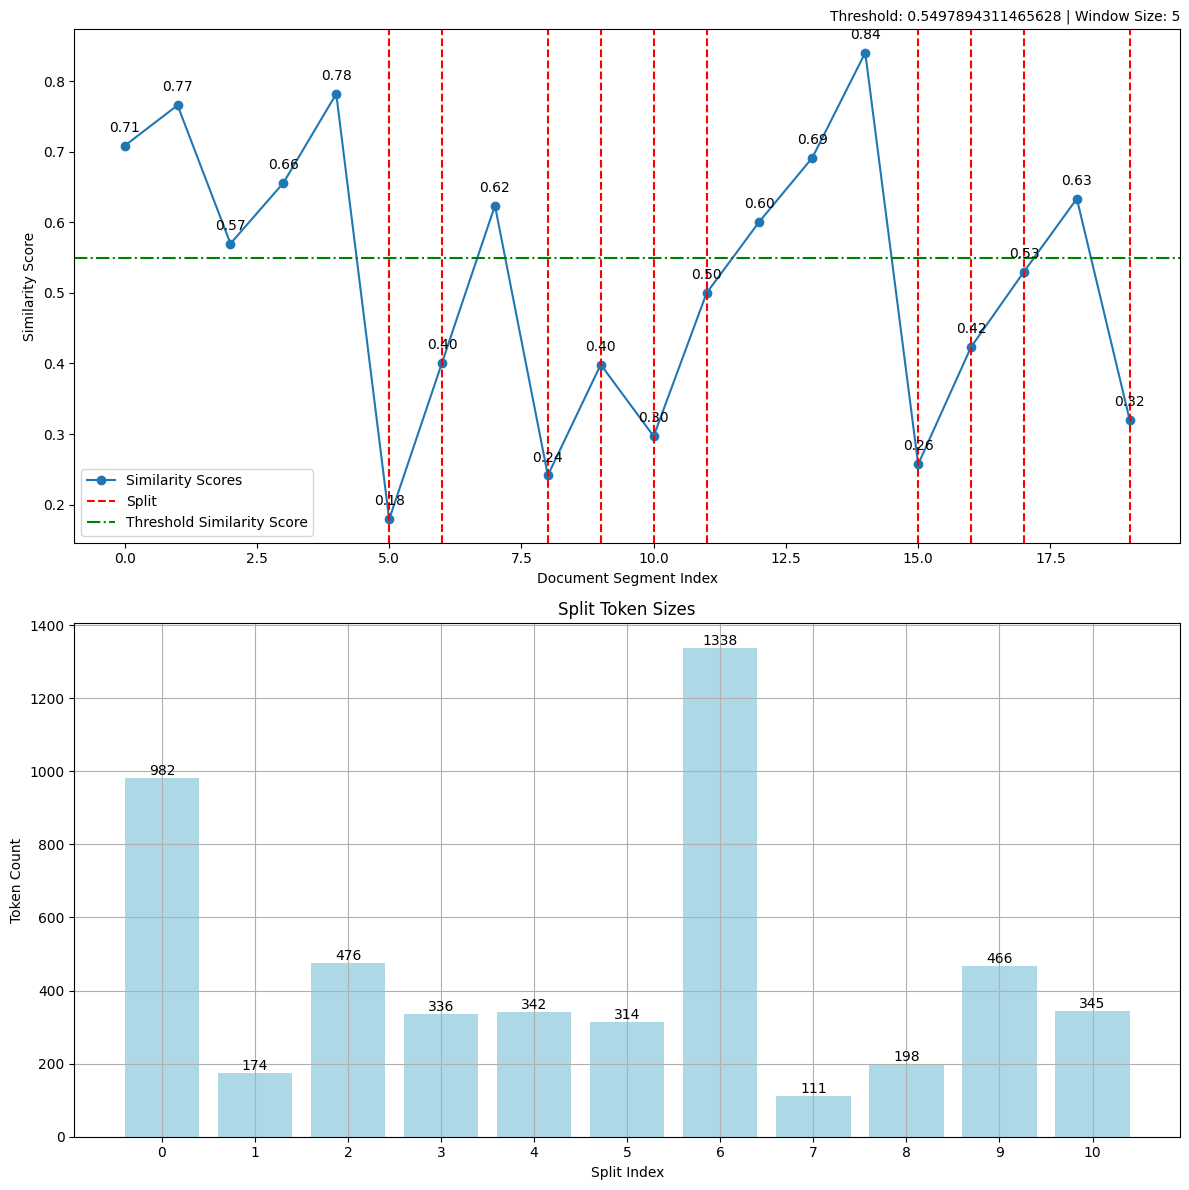

Splitting Statistics:
  - Total Documents: 21
  - Total Splits: 11
  - Splits by Threshold: 10
  - Splits by Max Chunk Size: 0
  - Last Split: 1
  - Minimum Token Size of Split: 111
  - Maximum Token Size of Split: 1338
  - Similarity Split Ratio: 0.91


[DocumentSplit(docs=['Ingredientes\n3 batatas grandes com casca\n100 g de bacon picado\n50 g de cebola picada\n250 g de peito de frango cozido e desfiado (ou presunto, carne moída refogada, linguiça grelhada e picada)\n100 g de requeijão cremoso\nCheiro-verde (salsinha e cebolinha) picado a gosto\nParmesão ralado para polvilhar', 'Modo de Preparo\n\n1\nLave bem as batatas e retire uma tampa no sentido do comprimento.\n2\nDisponha na panela de pressão, cubra com água e leve ao fogo médio.\n3\nAssim que começar a chiar, conte 10 minutos.\n4\nLibere a pressão para abrir a panela, retire as batatas e, com uma colher, cave o miolo (com cuidado para não perfurar). Reserve as batatas e o miolo.\n5\nFrite o bacon na própria gordura em fogo médio até dourar.', '6\nAdicione a cebola e refogue até dourar.\n7\nMisture com metade do miolo das batatas (com a outra metade, faça um purê), o frango desfiado, o requeijão e cheiro-verde a gosto.\n8\nRecheie a cavidade das batatas e polvilhe parmesão rala

In [35]:
# instanciando modelo de encoder e splitter
encoder = OpenAIEncoder(name='text-embedding-3-large')
splitter = RollingWindowSplitter(
    encoder=encoder,
    min_split_tokens=100, # tamanho minimo do chunk
    max_split_tokens=2000, # tamanho maximo do chunk
    window_size=5,         # janela de contexto (5 chunks)
    plot_splits=True,       # habilita o grafico de chunks
    enable_statistics=True  # habilita as estatisticas dos seus chunks
)
splits = splitter(texto)
splits

In [38]:
splits[0].docs

['Ingredientes\n3 batatas grandes com casca\n100 g de bacon picado\n50 g de cebola picada\n250 g de peito de frango cozido e desfiado (ou presunto, carne moída refogada, linguiça grelhada e picada)\n100 g de requeijão cremoso\nCheiro-verde (salsinha e cebolinha) picado a gosto\nParmesão ralado para polvilhar',
 'Modo de Preparo\n\n1\nLave bem as batatas e retire uma tampa no sentido do comprimento.\n2\nDisponha na panela de pressão, cubra com água e leve ao fogo médio.\n3\nAssim que começar a chiar, conte 10 minutos.\n4\nLibere a pressão para abrir a panela, retire as batatas e, com uma colher, cave o miolo (com cuidado para não perfurar). Reserve as batatas e o miolo.\n5\nFrite o bacon na própria gordura em fogo médio até dourar.',
 '6\nAdicione a cebola e refogue até dourar.\n7\nMisture com metade do miolo das batatas (com a outra metade, faça um purê), o frango desfiado, o requeijão e cheiro-verde a gosto.\n8\nRecheie a cavidade das batatas e polvilhe parmesão ralado.\n9\nDisponha e

In [39]:
splits[1].docs

['O Que São Large Language Models (LLMs)?\nO Que Sao Large Language Models\nOs Modelos de Linguagem de Grande Escala (Large Language Models ou LLMs) são um tipo de modelo de Inteligência Artificial criado para entender e gerar texto.\n\nEsses modelos são treinados em grandes volumes de dados da internet, aprendendo padrões sobre como as palavras e frases são comumente usadas juntas. Quando alimentado com uma nova entrada de texto, um LLM tentará prever ou gerar a continuação mais provável desse texto com base no que aprendeu durante o treinamento. Embora os LLMs já existam há algum tempo, ganharam a mídia através do ChatGPT, interface de chat para modelos LLM GPT-3 e GPT-4.\n\n']

In [40]:
splits[2].docs


['Muitos modelos LLM são criados com Deep Learning através de arquitetura Transformer. Aqui na DSA os LLMs são estudados em diversos projetos do curso de Processamento de Linguagem Natural com Transformers, da Formação Engenheiro de IA.\n\nVamos trazer para você uma série de artigos sobre os LLMs. E vamos começar respondendo: O Que São Large Language Models (LLMs)?\n\nAproveite a leitura.',
 'Compreendendo os LLMs\nOs Large Language Models (LLMs) são modelos de aprendizado de máquina (Machine Learning) que usam algoritmos de aprendizado profundo (Deep Learning) para processar e entender a linguagem natural.\n\nEsses modelos são treinados em grandes quantidades de dados de texto para aprender padrões e relacionamentos entre entidades no idioma. Os LLMs podem realizar muitos tipos de tarefas de linguagem, como tradução de idiomas, análise de sentimentos, conversas de chatbot e muito mais. Eles podem entender dados textuais complexos, identificar entidades e relacionamentos entre eles e g

In [44]:
splits[6].docs


['Antes de mais nada, é fundamental falarmos sobre o que é o carburador de moto e para que serve esse componente. Eles foram os primeiros mecanismos de alimentação de combustível da história dos veículos automotores, tendo popularidade até meados dos anos 90.\n\nPara que você possa entender melhor esse assunto, vale comentar que o motor a combustão funciona basicamente por meio da queima de combustível dentro do cilindro. Com a energia proveniente da explosão do combustível, é possível produzir força mecânica necessária para a movimentação dos pistões, que gira o virabrequim e gera o torque ideal para a movimentação da motocicleta.\n\nVocê deve estar se perguntando em que parte entra o carburador nessa história. Ele tem a função de fracionar a quantidade correta de ar e combustível ideal para uma queima eficiente. Isso porque a reação química do combustível exige uma quantidade específica e proporcional de oxigênio, que é mediada pelo carburador. Quando essa peça está desregulada há o 

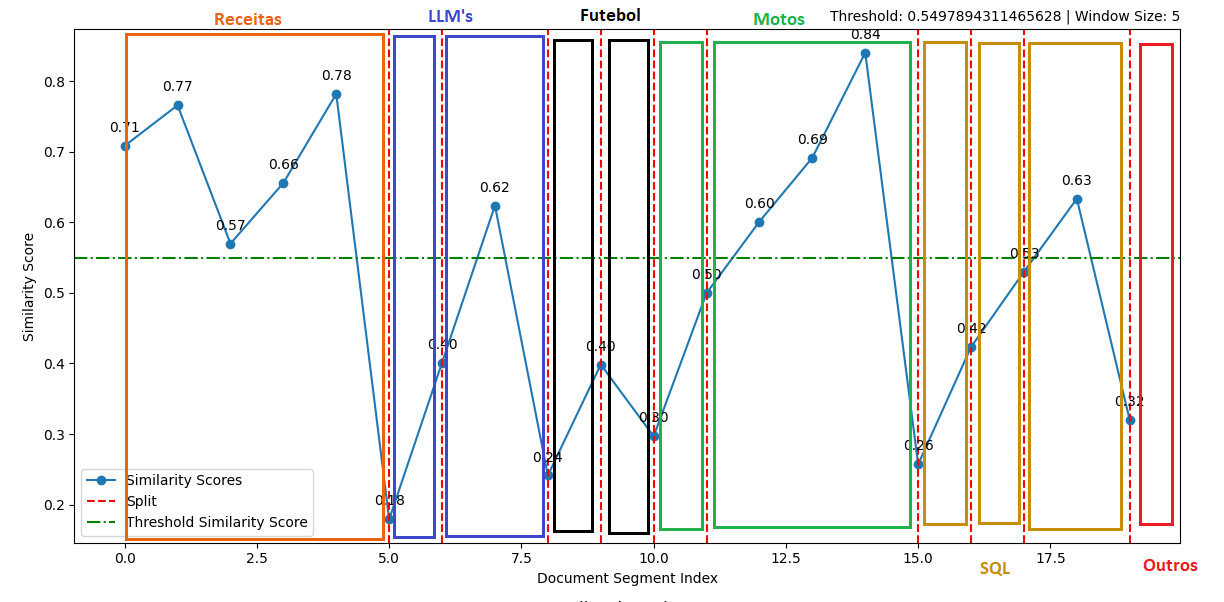